# Read observational data from weather mast at Haukeliseter site

Needed for the plot:
- precipitation
- temperature
- wind speed
- wind direction


In [13]:
import sys
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import datetime
from datetime import date
import math

import get_Haukeli_obs_data as obsDat
import TPU_savefig as PF
import calc_date as cd
import save_fig as SF
import createFolder as cF


In [14]:
sfig = 0
txtdir = '../../eklima'
txt_filename = 'Observations-hour_minutes.txt'
figdir = '../../Observations_results/Haukeli_weathermast'
cF.createFolder(figdir)
form = 'png'

In [15]:
### define colors for colorbar
champ = 255
blue = np.array([1,74,159])/champ           # for the date



In [16]:
### Mean wind speed and direction
# http://www.intellovations.com/2011/01/16/wind-observation-calculations-in-fortran-and-python/


In [17]:
Haukeli = pd.read_csv('%s/%s' %(txtdir, txt_filename),\
                    sep = ';',header=19, skipfooter = 11, engine= 'python')

In [18]:
#pd.DataFrame(Haukeli)

In [19]:
DateHour = Haukeli['Date-Hour(UTC)']

RR_1 = Haukeli['RR_1'].astype(float)           # Precipitation (1 hour); [mm]
TA = Haukeli['TA'].astype(float)               # Air temperature; [deg C] 

FF = Haukeli['FF'].astype(float)         # Wind speed (10 meters above ground); [m/s]
DD = Haukeli['DD'].astype(float)     # Wind direction (FF); [degrees]

In [20]:
idxFF = np.where(FF[:] == -9999)
idxDD = np.where(DD[:] == -9999)

FF[idxFF[0][:]] = np.nan
DD[idxDD[0][:]] = np.nan

### calculate the U, V wind component for barb plot
# http://colaweb.gmu.edu/dev/clim301/lectures/wind/wind-uv.html

# first calculate the mathematical wind direction in deg
md_deg = 270 - DD
for k in range(0,md_deg.shape[0]):
    if md_deg[k] <0 :
        md_deg[k] = md_deg[k] +360
md_rad = math.pi/180. * md_deg
uwind = FF*np.cos(md_rad)
vwind = FF*np.sin(md_rad)

In [21]:
precip, dt_precip, hour_precip, day_precip, month_precip, year_precip = obsDat.valid_values(RR_1, DateHour)
temp, dt_temp, hour_temp, day_temp, month_temp, year_temp = obsDat.valid_values(TA, DateHour)
U_wind, V_wind, dt_wind, hour_wind, day_wind, month_wind, year_wind = obsDat.valid_values_wind(uwind, vwind, DateHour)


Thursday, 01 Dec 2016


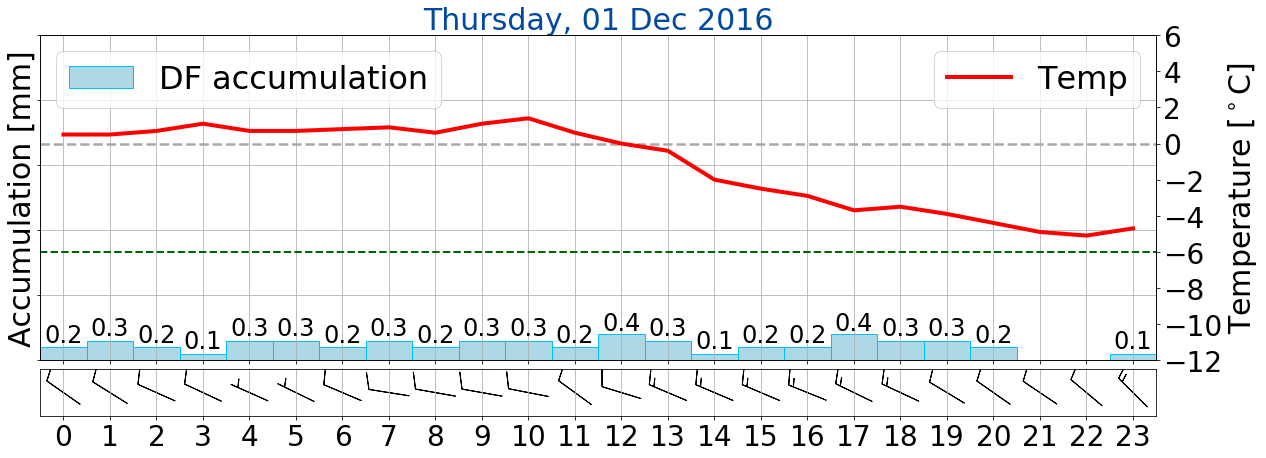

Friday, 02 Dec 2016


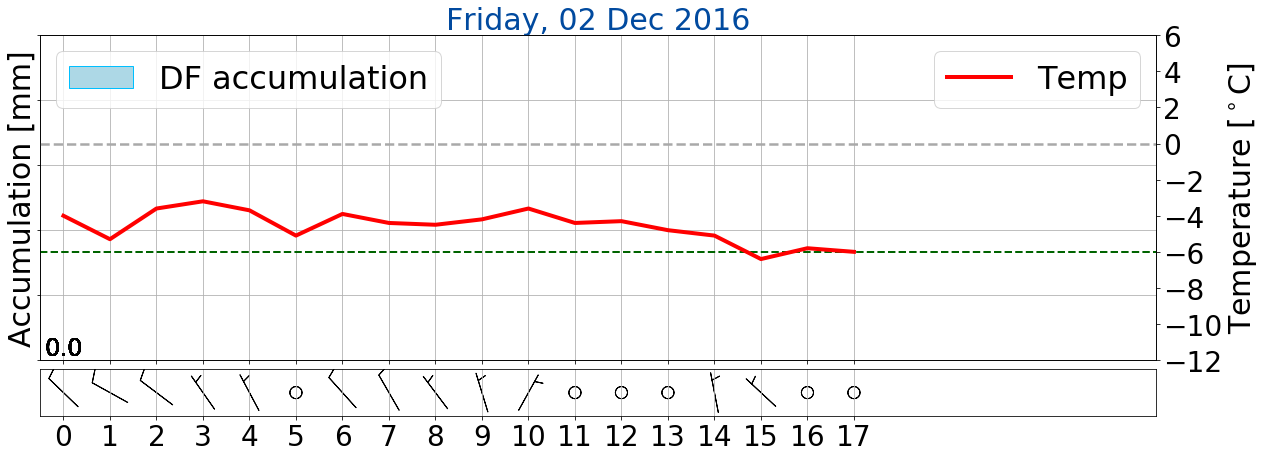

list is empty
list is empty
list is empty
Tuesday, 06 Dec 2016


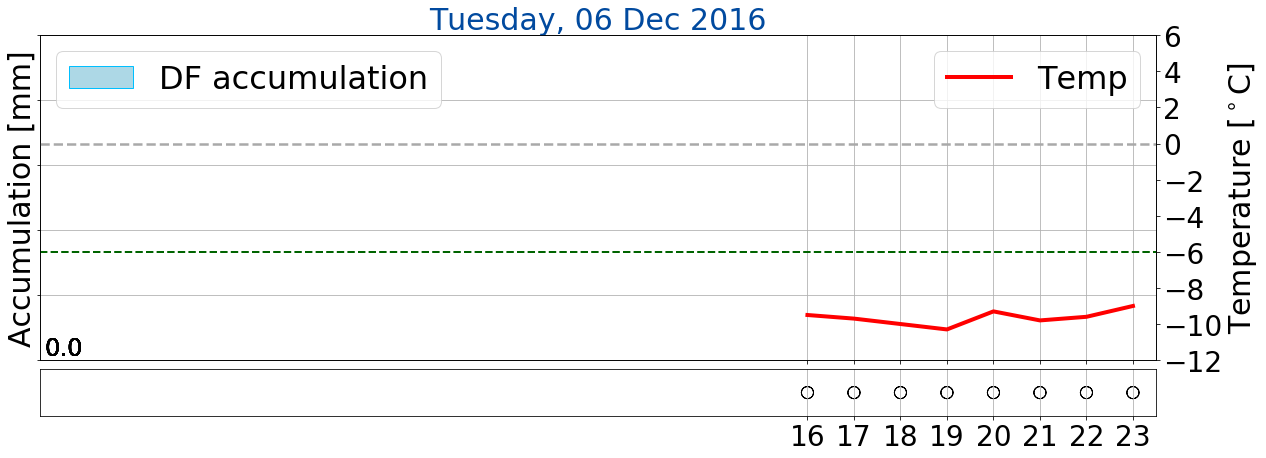

Wednesday, 07 Dec 2016


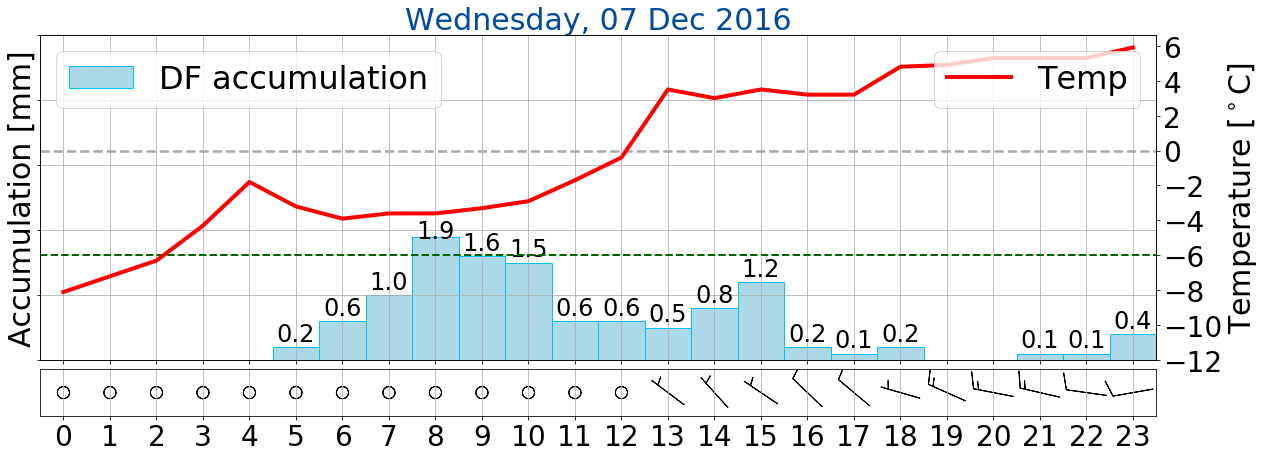

Thursday, 08 Dec 2016


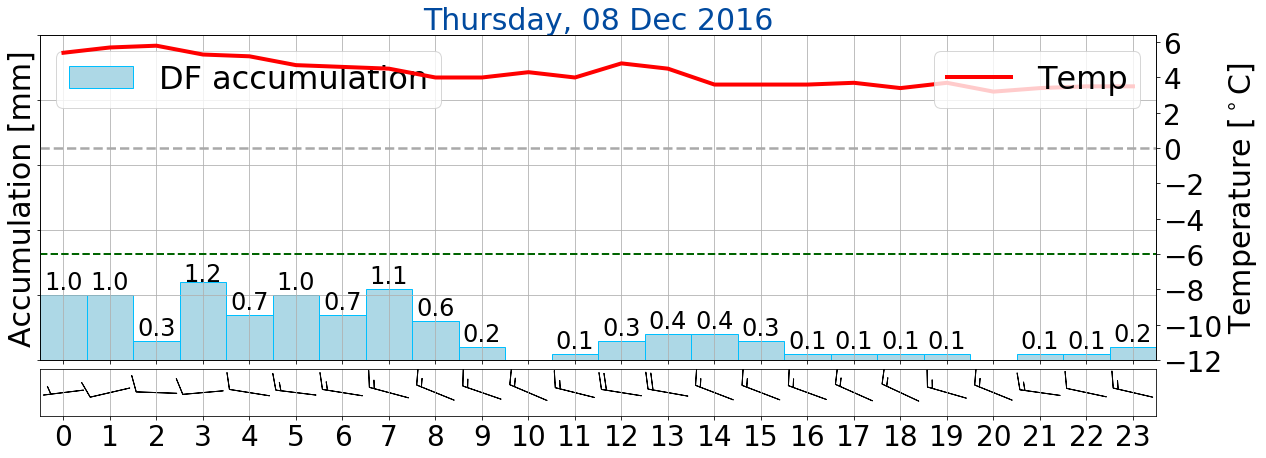

Friday, 09 Dec 2016


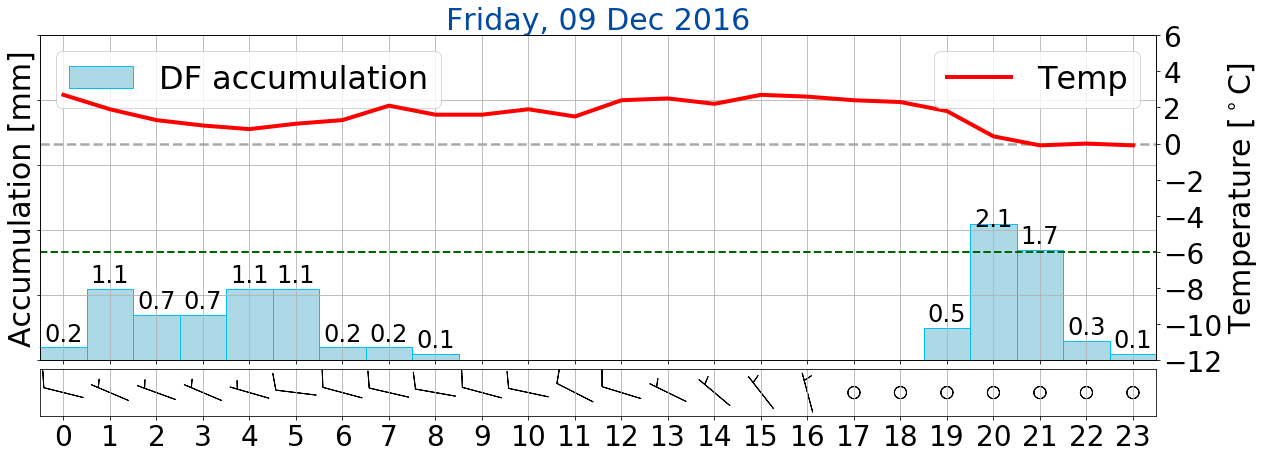

Saturday, 10 Dec 2016


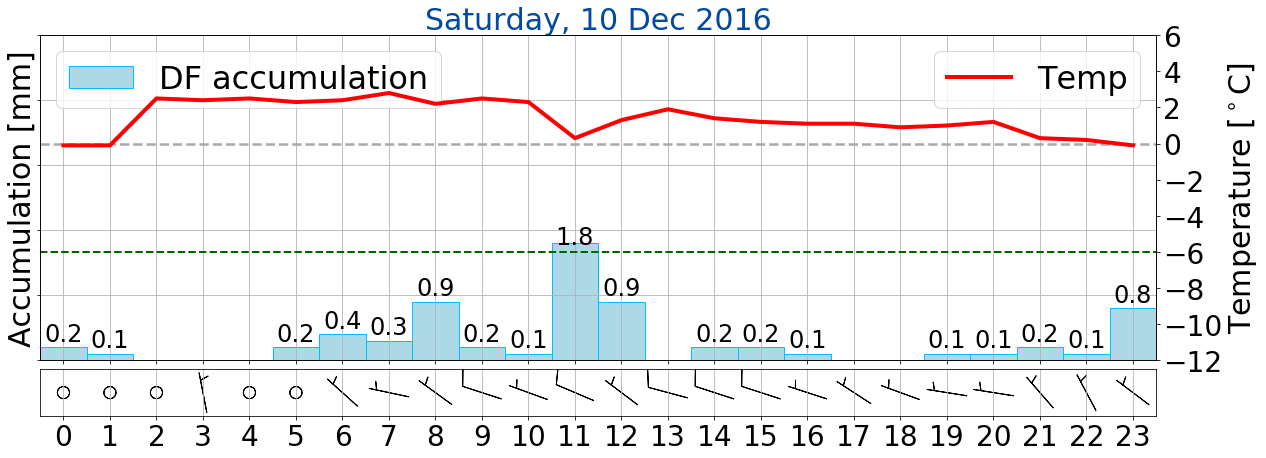

Sunday, 11 Dec 2016


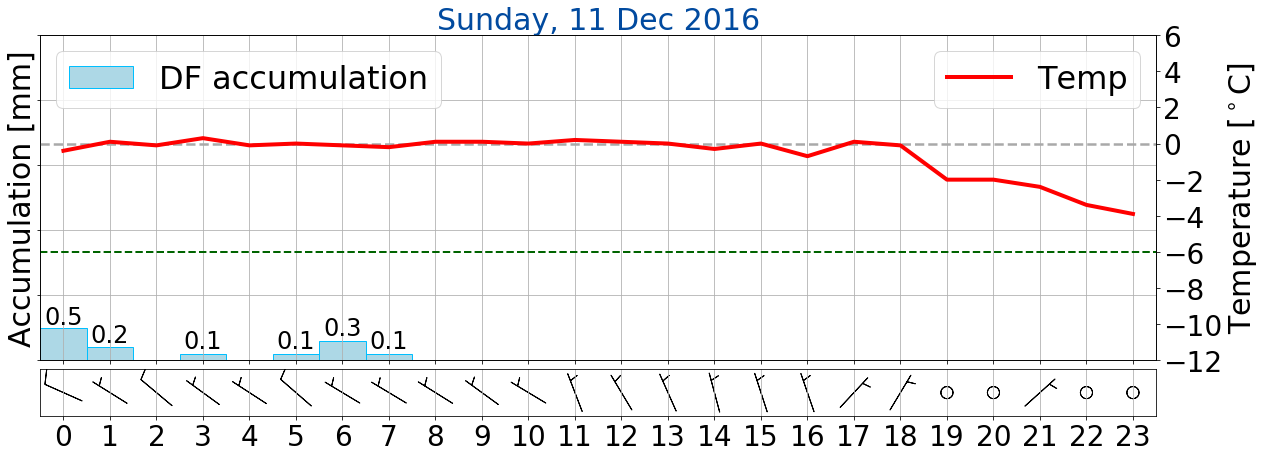

Monday, 12 Dec 2016


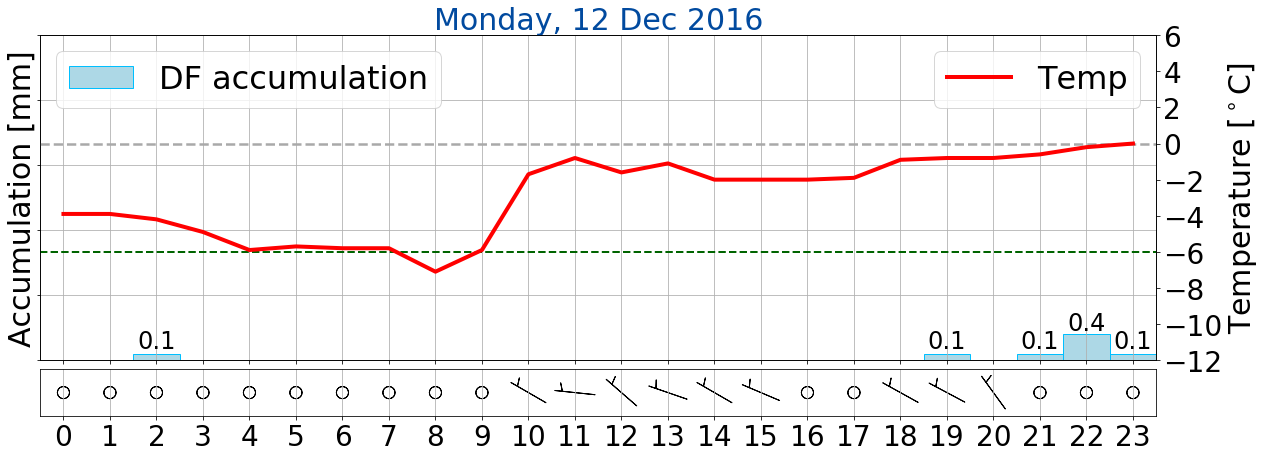

Tuesday, 13 Dec 2016


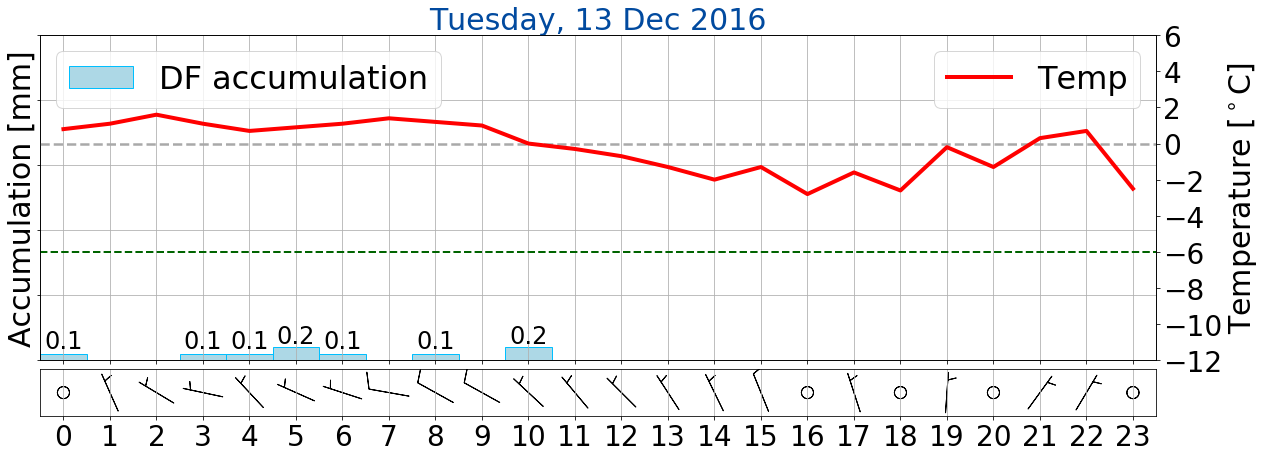

Wednesday, 14 Dec 2016


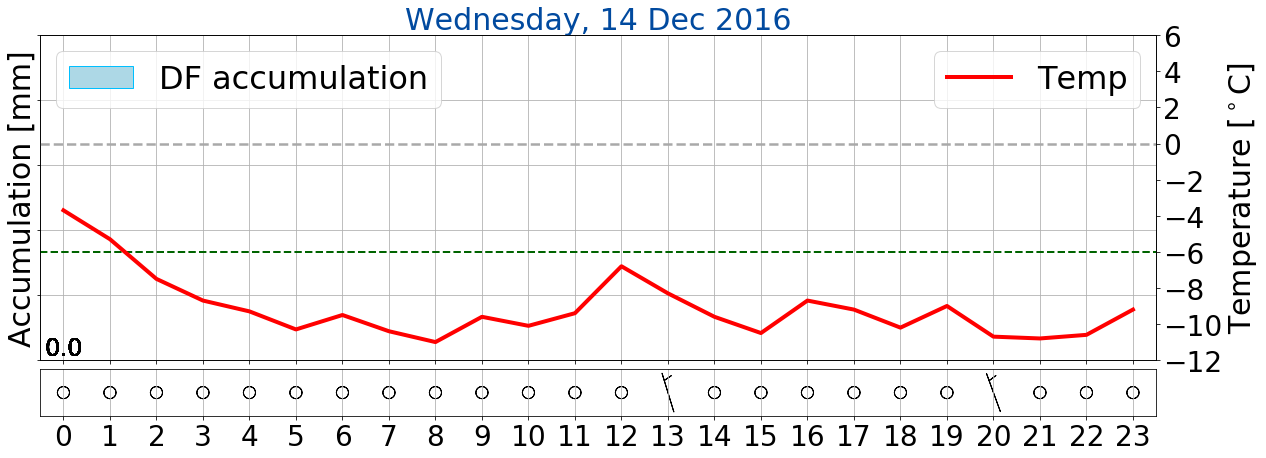

Thursday, 15 Dec 2016


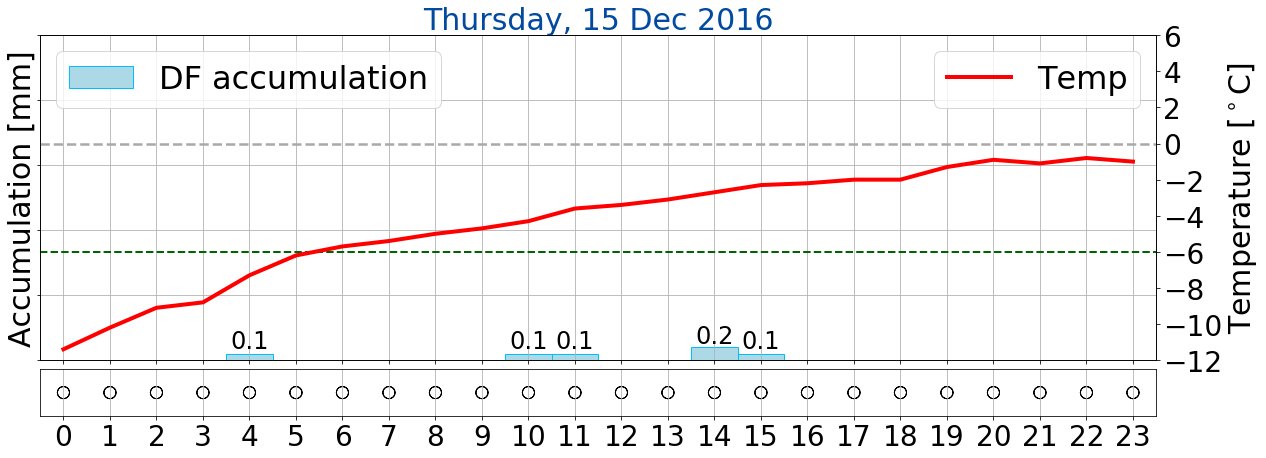

Friday, 16 Dec 2016


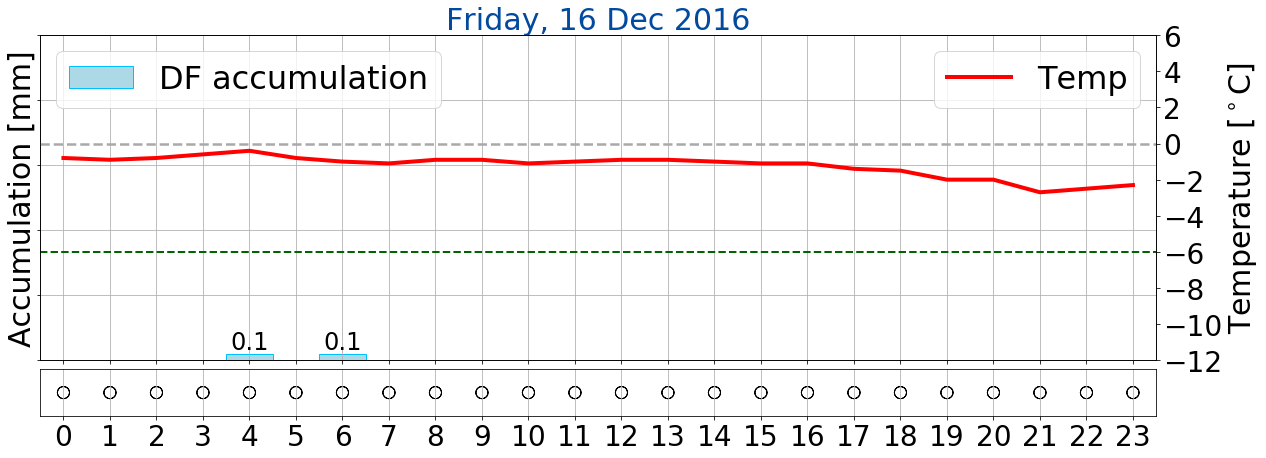

Saturday, 17 Dec 2016


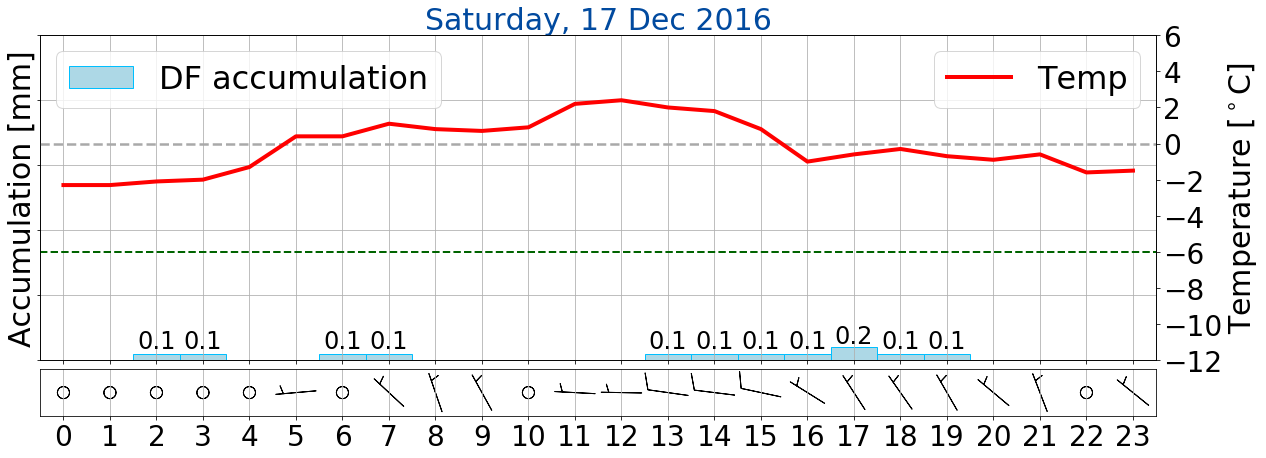

Sunday, 18 Dec 2016


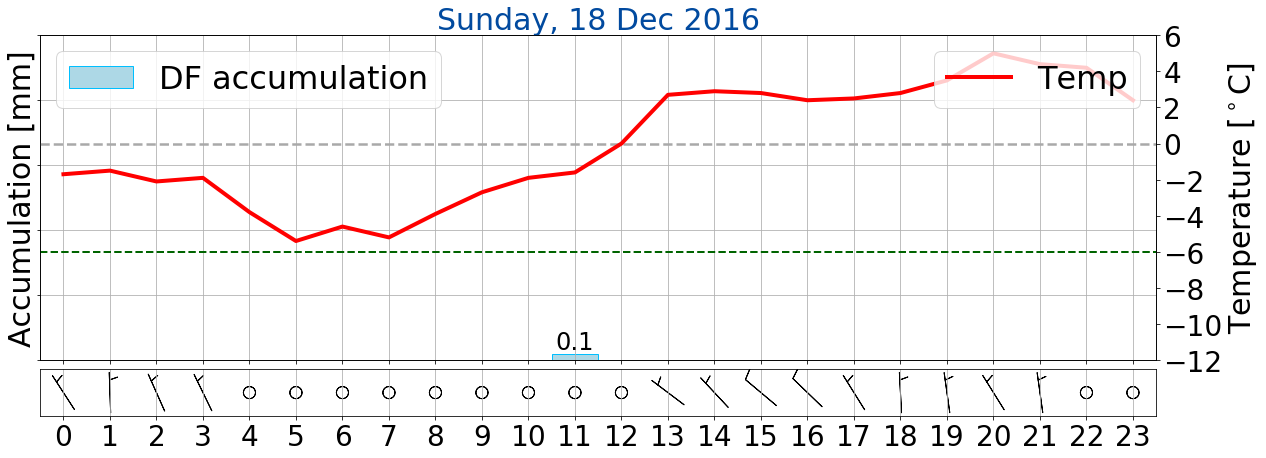

Monday, 19 Dec 2016


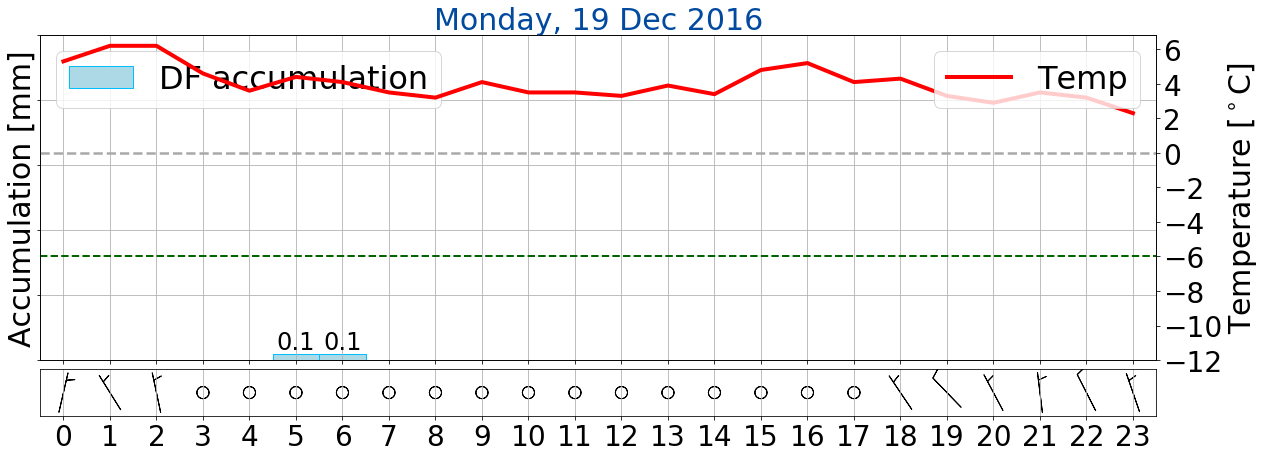

Tuesday, 20 Dec 2016


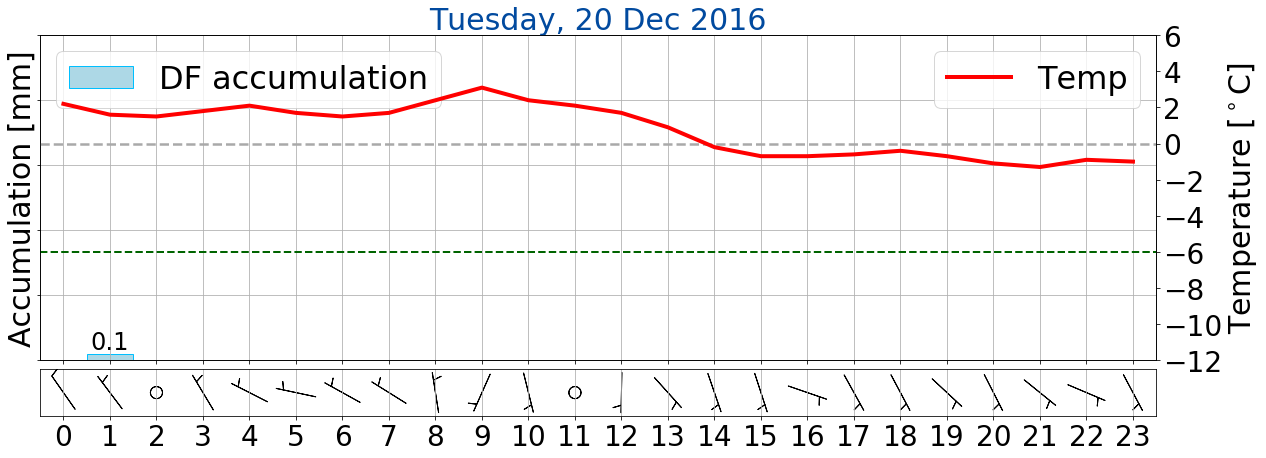

Wednesday, 21 Dec 2016


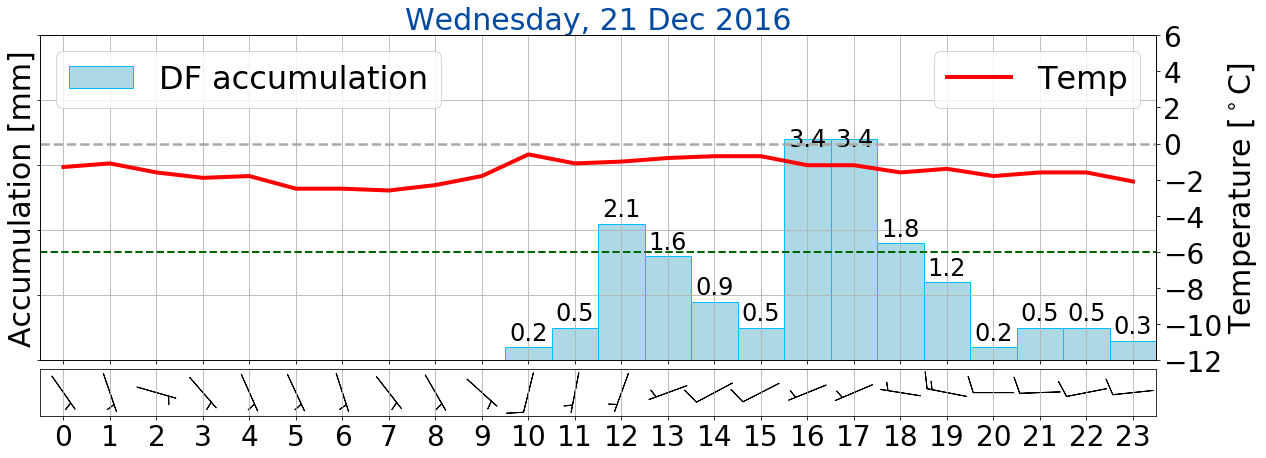

Thursday, 22 Dec 2016


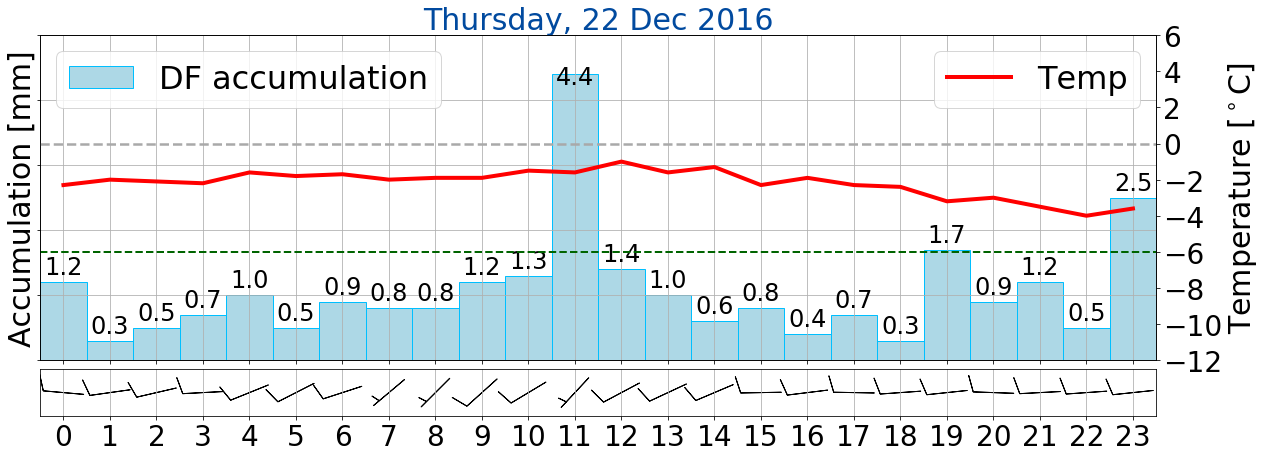

Friday, 23 Dec 2016


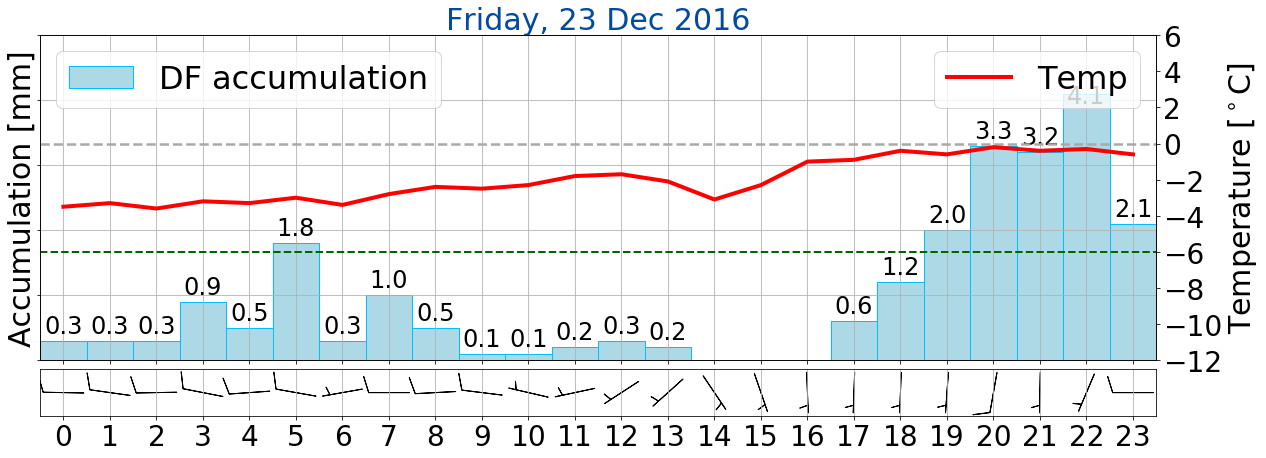

Saturday, 24 Dec 2016


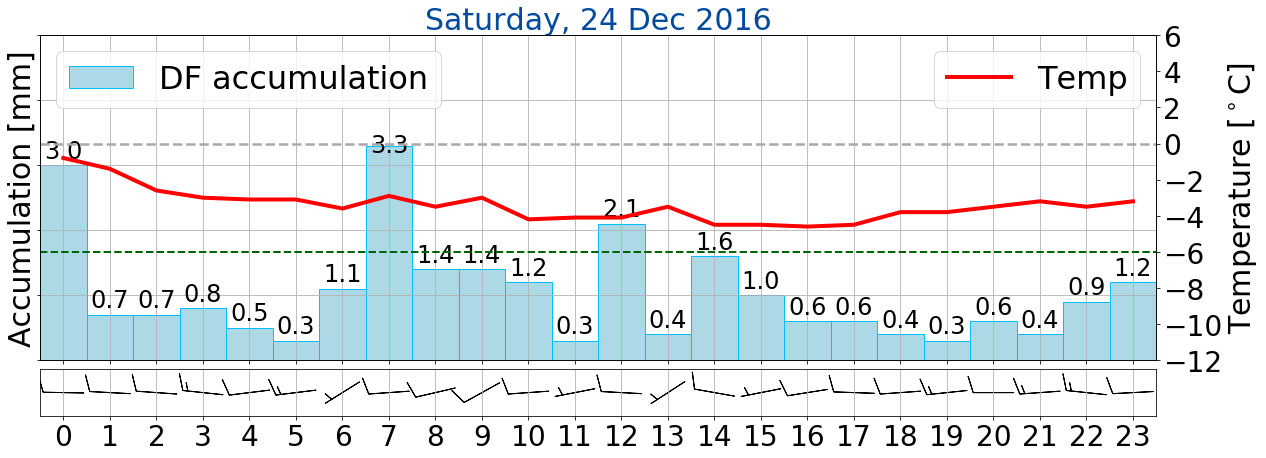

Sunday, 25 Dec 2016


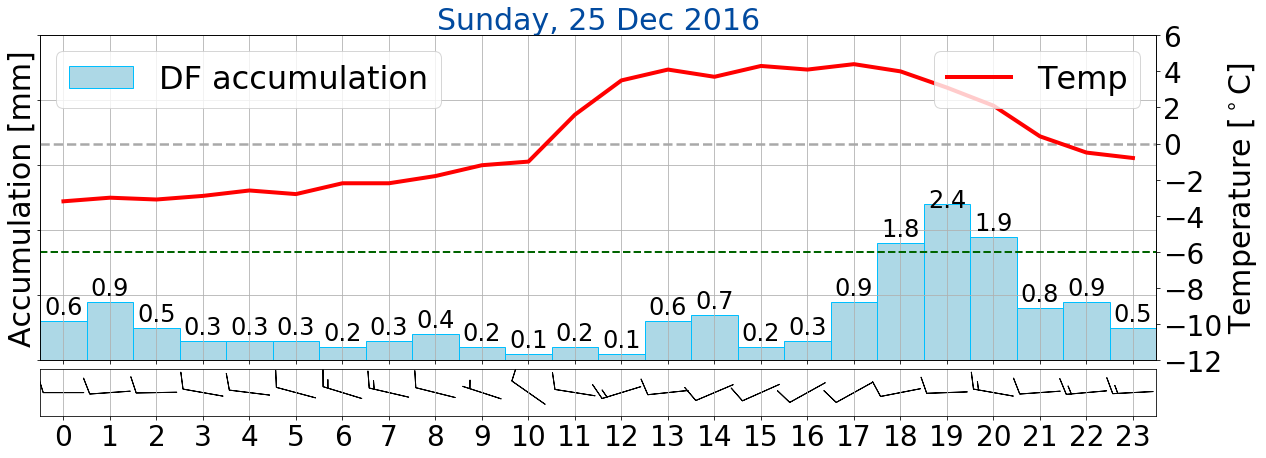

Monday, 26 Dec 2016


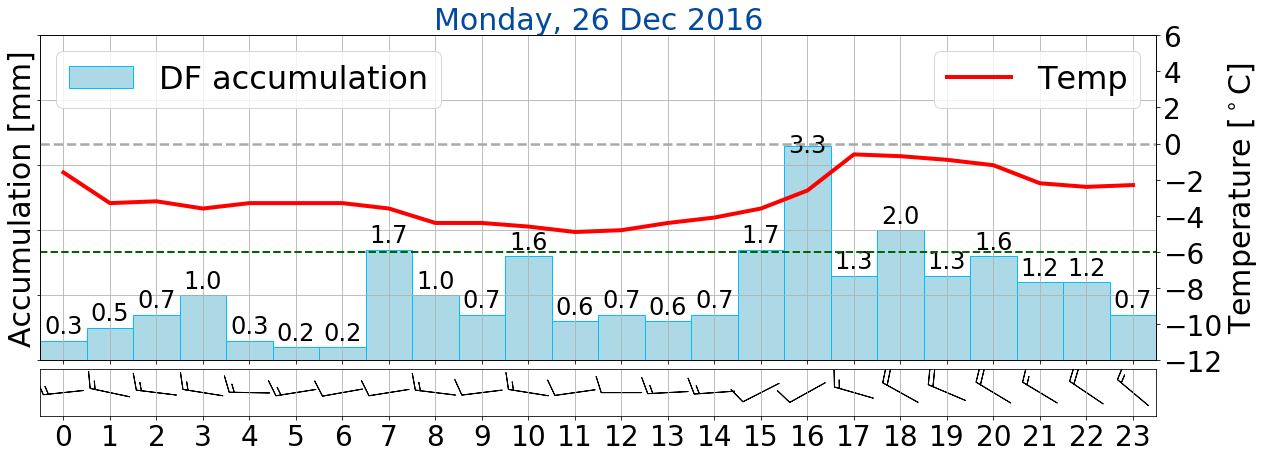

Tuesday, 27 Dec 2016


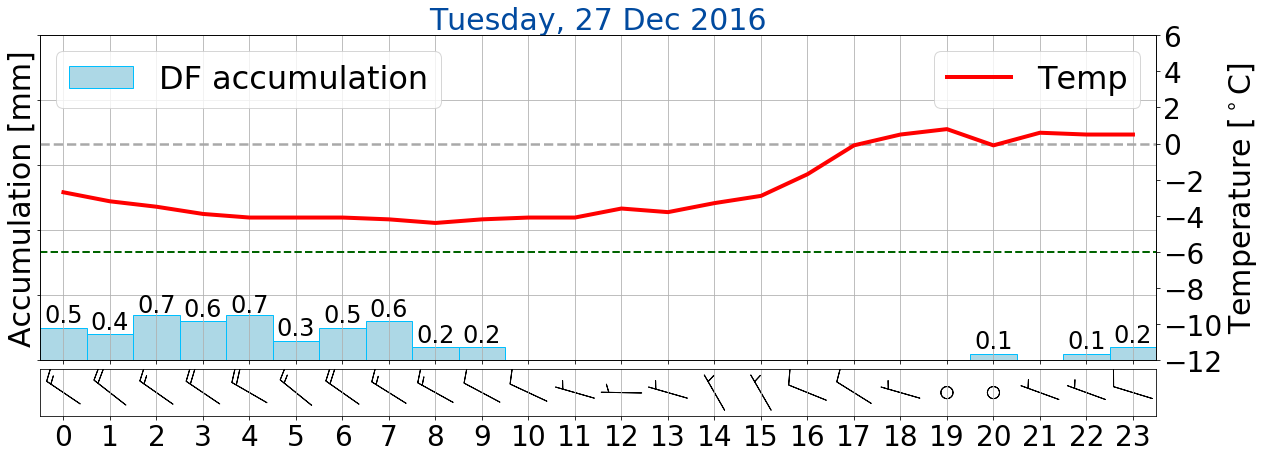

Wednesday, 28 Dec 2016


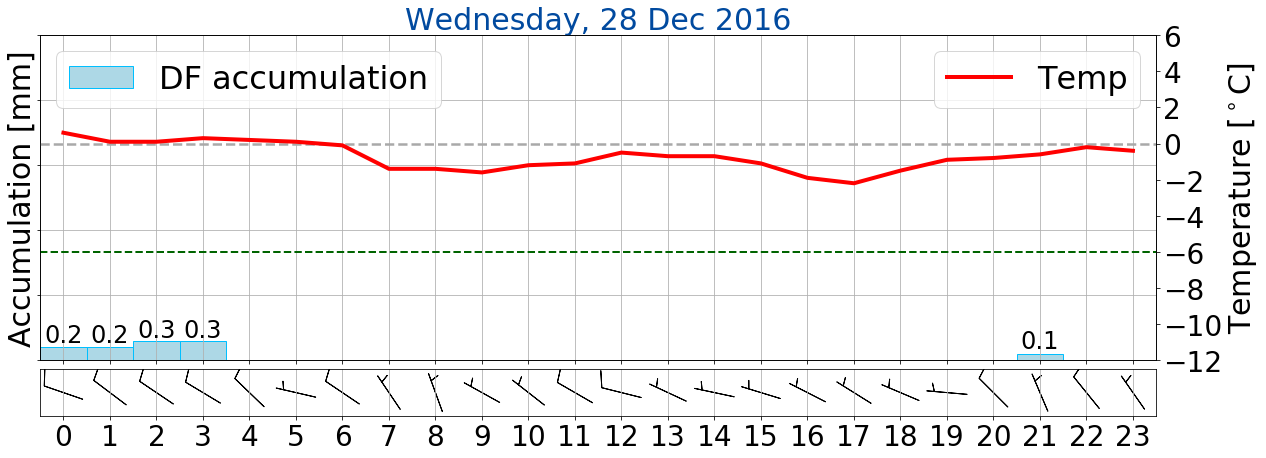

Thursday, 29 Dec 2016


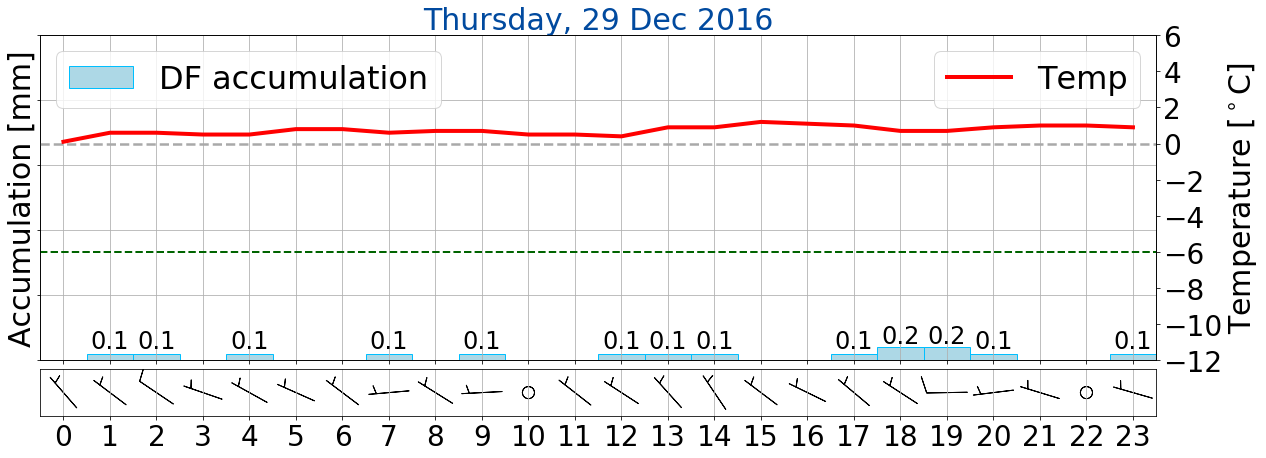

Friday, 30 Dec 2016


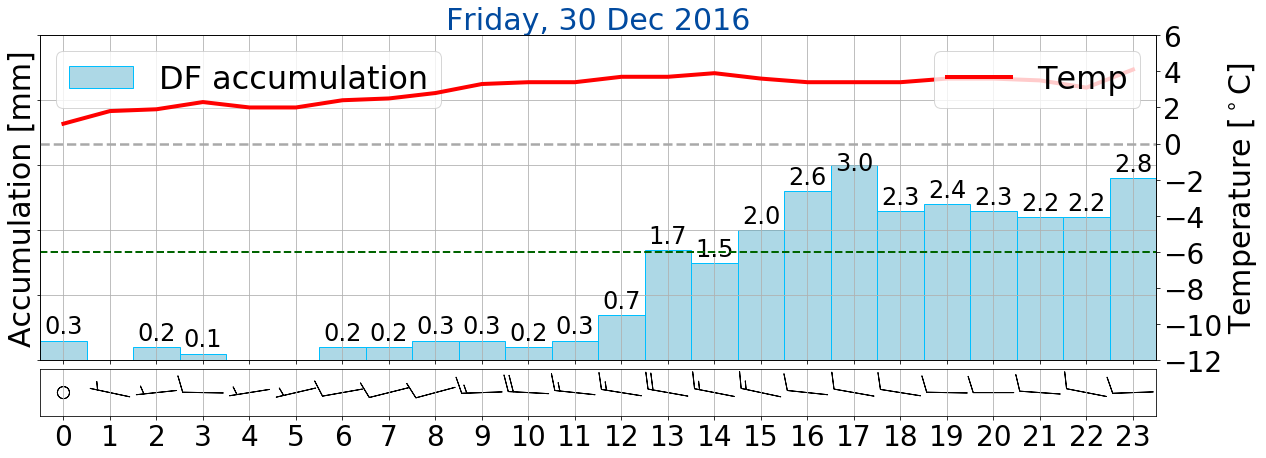

Saturday, 31 Dec 2016


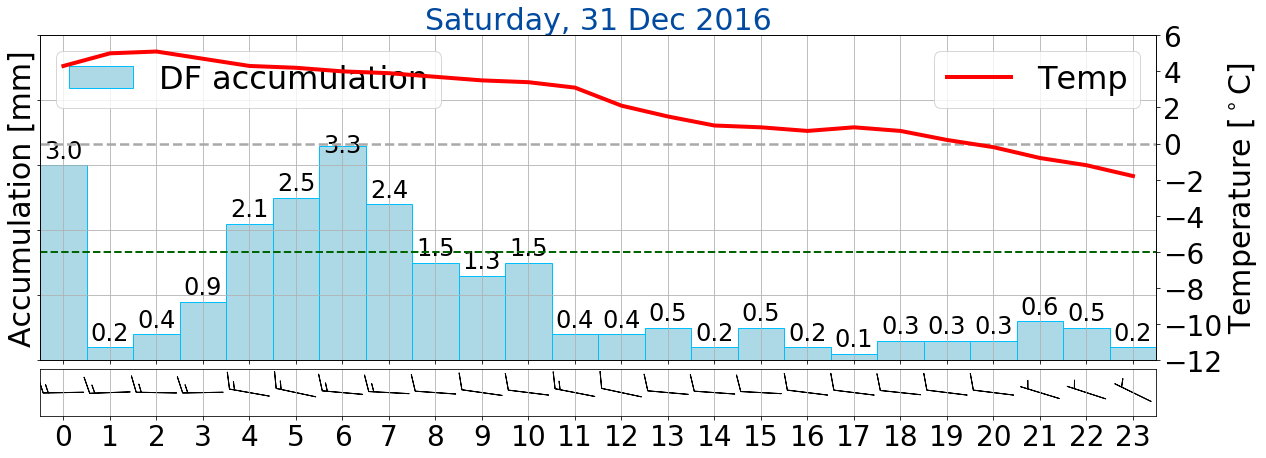

In [22]:
for k in range(0,31):
    if not (day_precip[k][:].any()):
        print('list is empty')
        continue
    
    if day_precip[k][0]< 10:
        dd = '0%s' %day_precip[k][0]
    else: 
        dd = '%s' %day_precip[k][0]
    calday, calmon = cd.get_dayname(year_precip[k][0],month_precip[k][0],day_precip[k][0])
    print('%s, %s %s %g' %(calday, (dd), calmon, (year_precip[k][0])))

    

    
    
    la0 = np.where(precip[k][:] > 0.0)
    if len(precip[k][la0]) == 0.:
        h_p = np.zeros((hour_temp[k][:].shape[0]))
        pp = np.zeros(temp[k][:].shape[0])
    else:
        h_p = hour_precip[k][la0]
        pp = precip[k][la0]
    
    figname = 'T_P_U_%s%s%s.png' % (year_precip[k][0], month_precip[k][0], dd)
    
    fig = plt.figure(figsize=(20,7))
    fontsize = 30
    
    if sfig ==1:
        PF.plot_TPU(fig, h_p, pp,
             hour_temp[k][:], temp[k][:], 
             hour_wind[k][:], np.zeros((hour_wind[k]).shape[0]), U_wind[k][:], V_wind[k][:],
             calday, dd, calmon, year_precip[k][0], fs = fontsize)
        SF.save_figure_landscape(figdir, figname, form)
    else:
        PF.plot_TPU(fig, h_p, pp,
             hour_temp[k][:], temp[k][:], 
             hour_wind[k][:], np.zeros((hour_wind[k]).shape[0]), U_wind[k][:], V_wind[k][:],
             calday, dd, calmon, year_precip[k][0], fs = fontsize)
        plt.show()
        
    plt.close()
    
